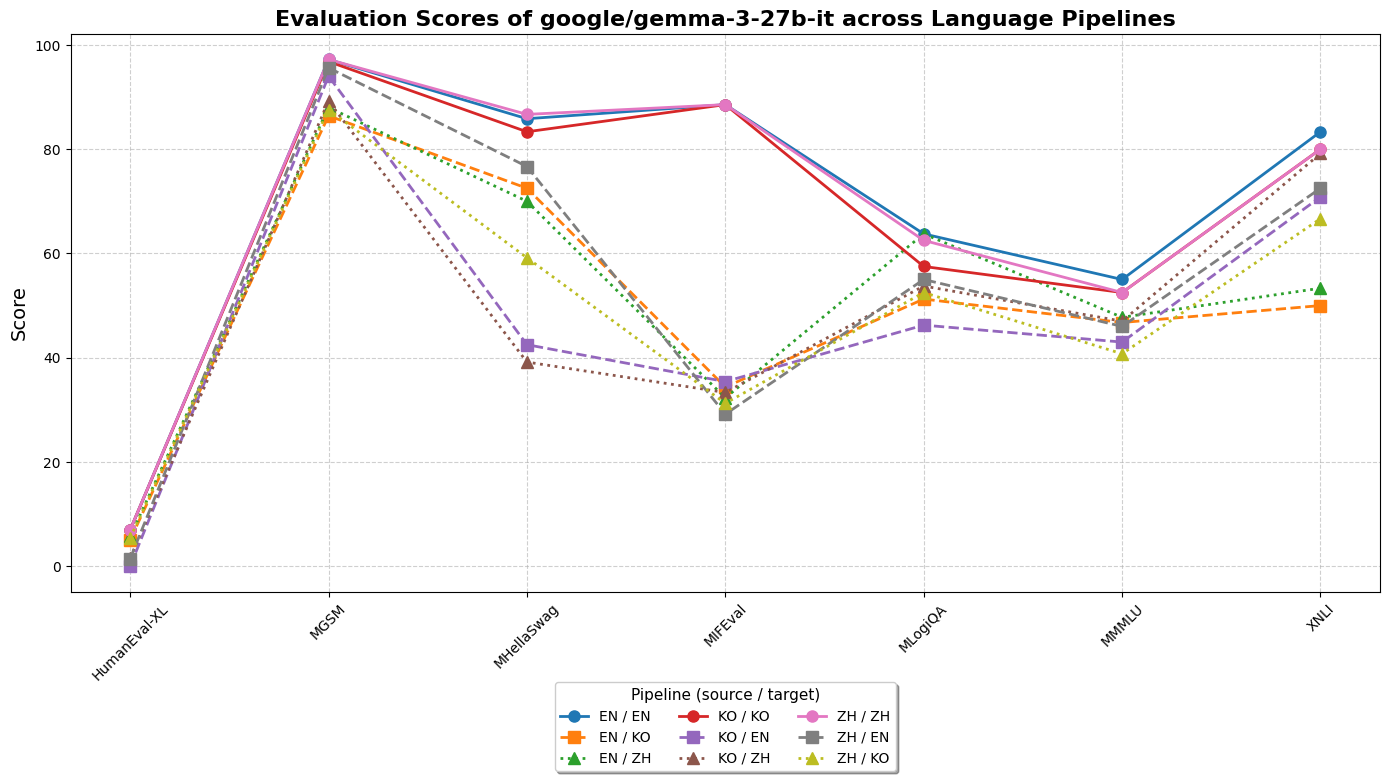

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Data setup
data = {
    "Evaluation": ["HumanEval-XL", "MGSM", "MHellaSwag", "MIFEval", "MLogiQA", "MMMLU", "XNLI"],
    "EN / EN": [6.97, 97.2, 85.8333, 88.54, 63.75, 55, 83.3333],
    "EN / KO": [5.1, 86.4, 72.5, 34.38, 51.25, 46.75, 50],
    "EN / ZH": [5.72, 88, 70, 32.29, 63.75, 47.75, 53.3333],
    
    "KO / KO": [6.97, 96.8, 83.33, 88.54, 57.5, 52.5, 80],
    "KO / EN": [0.02, 94, 42.5, 35.42, 46.25, 43, 70.8333],
    "KO / ZH": [1.56, 89.2, 39.166, 33.33, 53.75, 47, 79.1667],

    "ZH / ZH": [6.979, 97.2, 86.6667, 88.54, 62.5, 52.5, 80],
    "ZH / EN": [1.458, 95.6, 76.6667, 29.17, 55, 46, 72.5],
    "ZH / KO": [5.416, 87.6, 59.1667, 31.25, 52.5, 40.75, 66.6667],
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 8))
markers    = ['o', 's', '^', 'o', 's', '^', 'o', 's', '^']
linestyles = ['-', '--', ':', '-', '--', ':', '-', '--', ':']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']

columns_to_plot = [col for col in df.columns if col != 'Evaluation']

for i, col in enumerate(columns_to_plot):
    plt.plot(df['Evaluation'], df[col], label=col, marker=markers[i % len(markers)],
             linestyle=linestyles[i % len(linestyles)], linewidth=2, markersize=8, color=colors[i % len(colors)])

plt.title("Evaluation Scores of google/gemma-3-27b-it across Language Pipelines", fontsize=16, fontweight='bold')
plt.xlabel("Task", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Pipeline (source / target)", fontsize=10, title_fontsize=11, loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=3, frameon=True, shadow=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


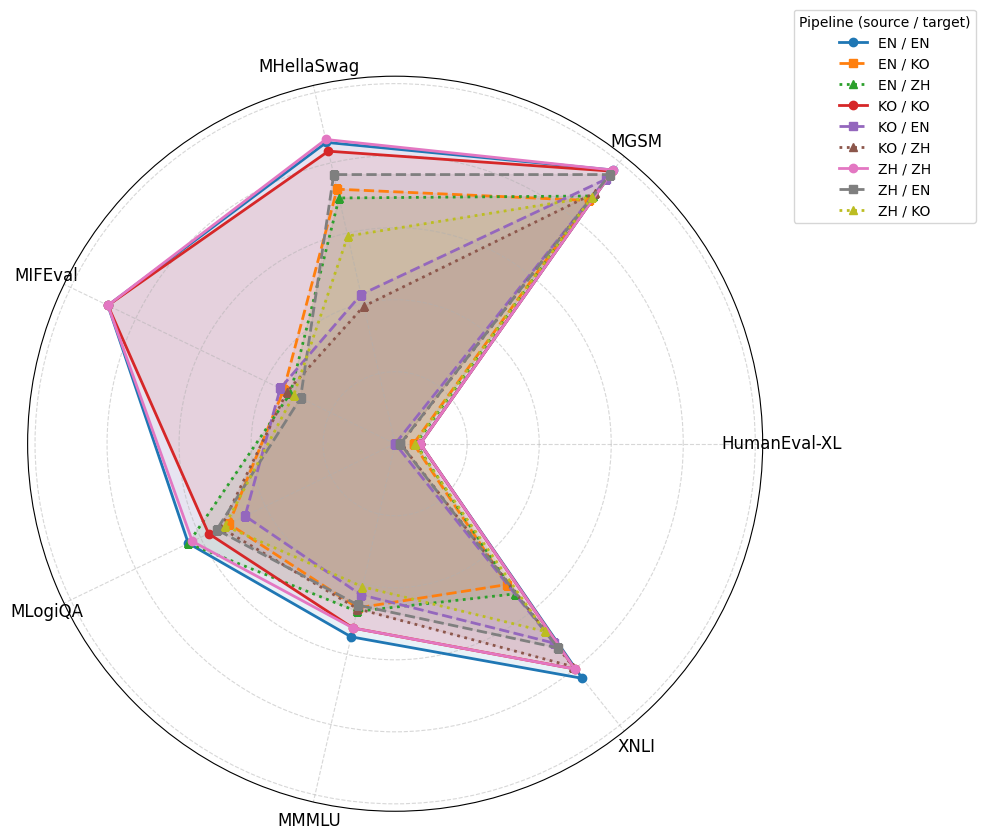

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Radar chart setup
def make_radar_chart(df, categories, labels, title):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    for i, label in enumerate(labels):
        values = df[label].tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=label, linewidth=2, linestyle=linestyles[i % len(linestyles)],
                marker=markers[i % len(markers)], color=colors[i % len(colors)])
        ax.fill(angles, values, alpha=0.1, color=colors[i % len(colors)])

    # ax.set_title(title, size=18, weight='bold', y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels([])
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10, title="Pipeline (source / target)")

    plt.tight_layout()
    plt.show()

# Plot radar chart
categories = df['Evaluation'].tolist()
labels = [col for col in df.columns if col != 'Evaluation']
make_radar_chart(df, categories, labels, "Results of P-MMEval Evaluation on different Language Pipelines")


In [4]:
# rescoring
import json
import os

english_related_keys = {
    "combination:repeat_prompt",
    "combination:two_responses",
    "detectable_content:number_placeholders",
    "detectable_content:postscript",
    "detectable_format:constrained_response",
    "detectable_format:json_format",
    "detectable_format:number_bullet_lists",
    "detectable_format:number_highlighted_sections",
    "detectable_format:title",
    "keywords:forbidden_words",
    "length_constraints:nth_paragraph_first_word",
    "length_constraints:number_paragraphs",
    "length_constraints:number_sentences",
    "length_constraints:number_words",
    "punctuation:no_comma",
    "startend:end_checker",
    "startend:quotation"
}

def rescoring(folder: str, including_set: set):
    with open(os.path.join(folder, "score.json"), "r") as f:
        ifeval_result = json.load(f)
        
    # Get all tier1 accuracy scores
    tier1_scores = ifeval_result["loose"]["tier1_instruction_accuracy"]

    # Filter out English-related subcategories
    filtered_scores = {
        k: v for k, v in tier1_scores.items() if k in including_set
    }
    
    # Calculate average of filtered scores
    average_filtered_score = sum(filtered_scores.values()) / len(filtered_scores)

    # Display results
    print("Tier1 Scores (excluding English-related subcategories):")
    for k, v in filtered_scores.items():
        print(f"  {k}: {v * 100:.4f}")

    print(f"\n➡️ Average Score (Non-English Tier1): {average_filtered_score*100:.4f}")
    

    


In [5]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/en",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 63.4100
  combination:two_responses: 100.0000
  detectable_content:number_placeholders: 81.4800
  detectable_content:postscript: 96.1500
  detectable_format:constrained_response: 100.0000
  detectable_format:json_format: 70.5900
  detectable_format:number_bullet_lists: 74.1900
  detectable_format:number_highlighted_sections: 83.3300
  detectable_format:title: 100.0000
  keywords:forbidden_words: 85.7100
  length_constraints:nth_paragraph_first_word: 83.3300
  length_constraints:number_paragraphs: 77.7800
  length_constraints:number_sentences: 84.6200
  length_constraints:number_words: 92.3100
  punctuation:no_comma: 92.4200
  startend:end_checker: 84.6200
  startend:quotation: 92.6800

➡️ Average Score (Non-English Tier1): 86.0365


In [6]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/zh",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 2.4400
  combination:two_responses: 8.3300
  detectable_content:number_placeholders: 48.1500
  detectable_content:postscript: 34.6200
  detectable_format:constrained_response: 0.0000
  detectable_format:json_format: 35.2900
  detectable_format:number_bullet_lists: 35.4800
  detectable_format:number_highlighted_sections: 62.5000
  detectable_format:title: 18.9200
  keywords:forbidden_words: 77.5500
  length_constraints:nth_paragraph_first_word: 25.0000
  length_constraints:number_paragraphs: 22.2200
  length_constraints:number_sentences: 48.0800
  length_constraints:number_words: 48.0800
  punctuation:no_comma: 13.6400
  startend:end_checker: 3.8500
  startend:quotation: 9.7600

➡️ Average Score (Non-English Tier1): 29.0535


In [7]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/zh-tw",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.0000
  combination:two_responses: 4.1700
  detectable_content:number_placeholders: 48.1500
  detectable_content:postscript: 30.7700
  detectable_format:constrained_response: 10.0000
  detectable_format:json_format: 5.8800
  detectable_format:number_bullet_lists: 22.5800
  detectable_format:number_highlighted_sections: 45.8300
  detectable_format:title: 16.2200
  keywords:forbidden_words: 79.5900
  length_constraints:nth_paragraph_first_word: 0.0000
  length_constraints:number_paragraphs: 22.2200
  length_constraints:number_sentences: 55.7700
  length_constraints:number_words: 59.6200
  punctuation:no_comma: 12.1200
  startend:end_checker: 11.5400
  startend:quotation: 4.8800

➡️ Average Score (Non-English Tier1): 25.2553


In [8]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/ko",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.0000
  combination:two_responses: 8.3300
  detectable_content:number_placeholders: 18.5200
  detectable_content:postscript: 38.4600
  detectable_format:constrained_response: 10.0000
  detectable_format:json_format: 17.6500
  detectable_format:number_bullet_lists: 22.5800
  detectable_format:number_highlighted_sections: 50.0000
  detectable_format:title: 13.5100
  keywords:forbidden_words: 71.4300
  length_constraints:nth_paragraph_first_word: 8.3300
  length_constraints:number_paragraphs: 7.4100
  length_constraints:number_sentences: 44.2300
  length_constraints:number_words: 53.8500
  punctuation:no_comma: 25.7600
  startend:end_checker: 3.8500
  startend:quotation: 4.8800

➡️ Average Score (Non-English Tier1): 23.4582


In [6]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/zh",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.0244
  combination:two_responses: 0.0833
  detectable_content:number_placeholders: 0.4815
  detectable_content:postscript: 0.3462
  detectable_format:constrained_response: 0.0000
  detectable_format:json_format: 0.3529
  detectable_format:number_bullet_lists: 0.3548
  detectable_format:number_highlighted_sections: 0.6250
  detectable_format:title: 0.1892
  keywords:forbidden_words: 0.7755
  length_constraints:nth_paragraph_first_word: 0.2500
  length_constraints:number_paragraphs: 0.2222
  length_constraints:number_sentences: 0.4808
  length_constraints:number_words: 0.4808
  punctuation:no_comma: 0.1364
  startend:end_checker: 0.0385
  startend:quotation: 0.0976

➡️ Average Score (Non-English Tier1): 29.0535


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_radar_graph(ax, columns, df, title):
    # Radar chart axes
    df_radar = df.dropna(subset=columns)

    # Compute angles
    num_vars = len(columns)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Initialize radar chart
    colors = plt.cm.tab20.colors
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    # Plot each template
    for i, row in df_radar.iterrows():
        values = [row[metric] for metric in columns]
        values += values[:1]
        ax.plot(angles, values, label=row["Template Name"], linewidth=1.5, color=colors[i % len(colors)])
        ax.fill(angles, values, alpha=0.1, color=colors[i % len(colors)])

    # Configure axes
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(columns, fontsize=12)
    ax.set_title(title, size=16, pad=20)
    ax.grid(True)
    ax.tick_params(axis='y', labelsize=8)

def plot_radar_subgraphs(df_list, columns, titles):
    num_plots = len(df_list)
    rows = 1
    cols = num_plots

    handles = []
    labels = []
    
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows), subplot_kw=dict(polar=True))
    axes = np.ravel(axes)  # Flatten the axes array for easy indexing

    for i, df in enumerate(df_list):
        plot_radar_graph(axes[i], columns[i], df, titles[i])
        
        # Collect handles and labels for the main legend (assuming each df has one template)
        if i == 0:
            for line in axes[i].lines:
                handles.append(line)
            for label in df["Template Name"].unique():
                labels.append(label)

    # Remove any unused subplots
    if num_plots < rows * cols:
        for j in range(num_plots, rows * cols):
            fig.delaxes(axes[j])

    fig.suptitle("", fontsize=20, y=1.05)
    fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=len(df_list), fontsize=10)
    fig.tight_layout(rect=[0, 0.1, 1, 0.95]) # Adjust layout to make space for the legend
    plt.show()



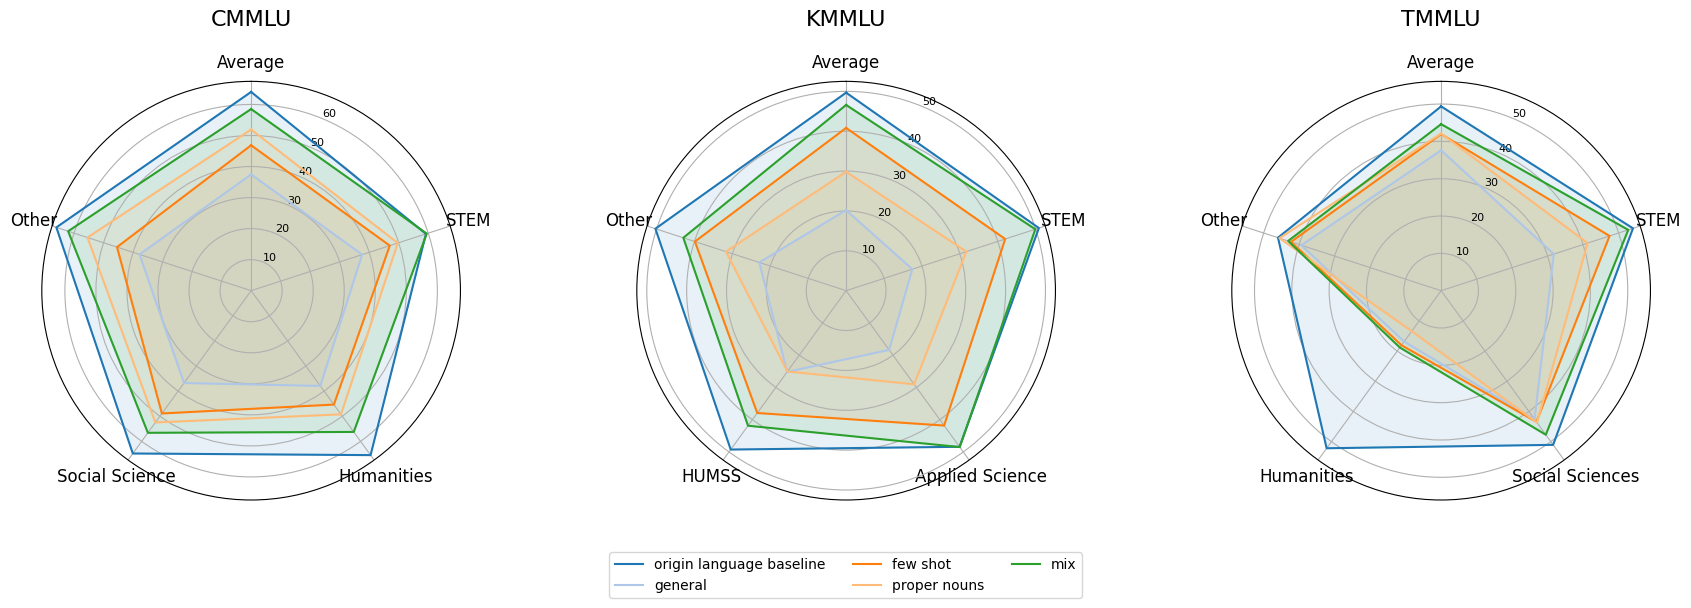

In [2]:
df_list = [
    pd.read_csv("/work/u5110390/BenchWeaver/logs/csv/CMMLU 1cb4c6c313b680ea9164de621bf021d8.csv"),
    pd.read_csv("/work/u5110390/BenchWeaver/logs/csv/KMMLU 1cb4c6c313b6801a8467ebb1229260e3.csv"),
    pd.read_csv("/work/u5110390/BenchWeaver/logs/csv/TMMLU 1c84c6c313b680a5b28def5d35e39a7d.csv")
]

titles = [
    "CMMLU",
    "KMMLU",
    "TMMLU"
]

columns = [
    ["Average", "STEM", "Humanities", "Social Science", "Other"],
    ["Average", "STEM", "Applied Science", "HUMSS", "Other"],
    ["Average", "STEM", "Social Sciences", "Humanities", "Other"]
]
plot_radar_subgraphs(df_list, columns, titles)

In [4]:
print(df_list[2])

              Template Name Inference Language  Average     STEM  \
0  origin language baseline                 ko  49.6746  50.8384   
1                   general                 en  20.1998  17.4646   
2                  few shot                 en  40.8250  41.9596   
3              proper nouns                 en  29.8430  31.7172   
4                       mix                 en  46.5886  49.8990   

   Applied Science    HUMSS    Other   資訊保留度   風格匹配度  專有名詞準確度    翻譯品質    翻譯平均  
0          48.4052  49.2593  50.3095     NaN     NaN      NaN     NaN     NaN  
1          18.3621  25.1852  22.9167  7.0321  8.7573   8.4842  7.0211  7.5124  
2          41.8190  37.9337  39.8810  7.4668  7.7882   7.9450  7.3861  7.6465  
3          29.0259  25.0487  31.6905  7.3756  7.8577   7.8642  7.3008  7.5996  
4          48.4914  41.8713  42.9405  7.8911  7.9001   8.5691  7.5684  7.9822  


/tmp/ipykernel_519889/1664480104.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(translation_metrics.values(), fontsize=12)
/tmp/ipykernel_519889/1664480104.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(translation_metrics.values(), fontsize=12)
/tmp/ipykernel_519889/1664480104.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(translation_metrics.values(), fontsize=12)


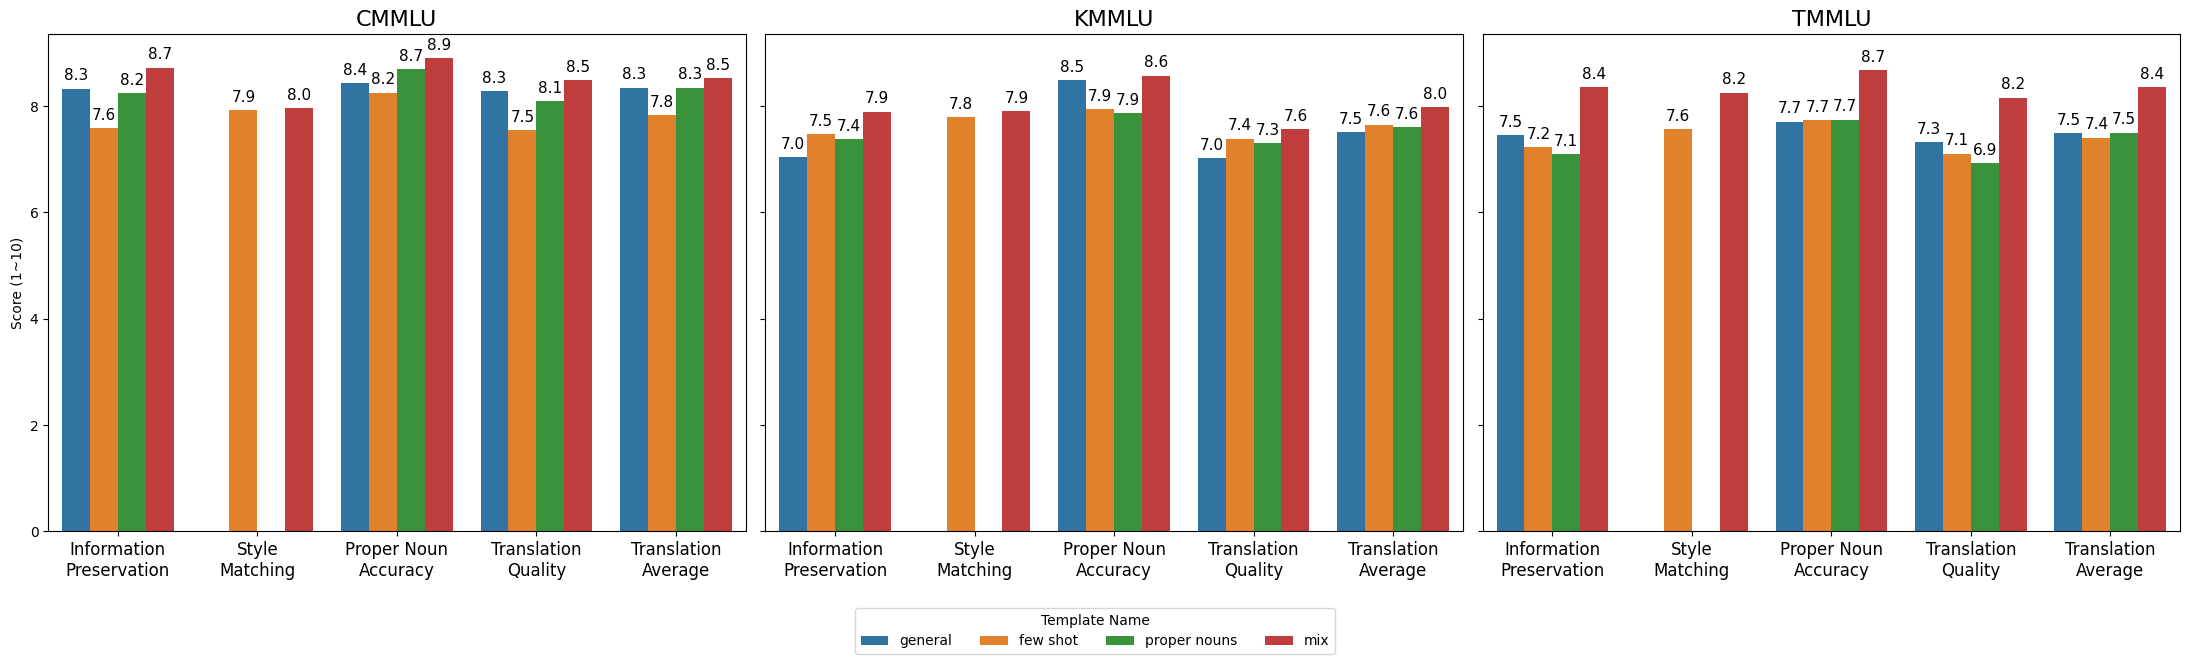

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar_graph_subplot(df:pd.DataFrame, ax, title):
    df = df.loc[1:5]  # Select top 5 rows
    for idx in range(len(df)):
        if df.loc[idx+1, 'Template Name'] in ['general', 'proper nouns']:
            df.loc[idx+1, '風格匹配度'] = None
            
    translation_metrics = {
        '資訊保留度': 'Information\nPreservation',
        '風格匹配度': 'Style\nMatching',
        '專有名詞準確度': 'Proper Noun\nAccuracy',
        '翻譯品質': 'Translation\nQuality',
        '翻譯平均': 'Translation\nAverage'
    }

    df_melted = df.melt(
        id_vars="Template Name",
        value_vars=translation_metrics.keys(),
        var_name="Metric",
        value_name="Score"
    )
    df_melted["Metric"] = df_melted["Metric"].map(translation_metrics)

    sns.barplot(data=df_melted, x="Metric", y="Score", hue="Template Name", ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel("Score (1~10)")
    ax.set_xlabel("")
    ax.set_xticklabels(translation_metrics.values(), fontsize=12)
    # Add value labels on bars
    for patch in ax.patches:
        height = patch.get_height()
        if not pd.isna(height) and height != 0:
            ax.text(
                patch.get_x() + patch.get_width() / 2,
                height + 0.1,
                f'{height:.1f}',
                ha='center',
                va='bottom',
                fontsize=11
            )
     
    ax.tick_params(axis='x', labelrotation=0)
    ax.legend_.remove()  # We'll create one shared legend later

# Load your CSVs
df1 = pd.read_csv("/work/u5110390/BenchWeaver/logs/csv/CMMLU 1cb4c6c313b680ea9164de621bf021d8.csv")
df2 = pd.read_csv("/work/u5110390/BenchWeaver/logs/csv/KMMLU 1cb4c6c313b6801a8467ebb1229260e3.csv")
df3 = pd.read_csv("/work/u5110390/BenchWeaver/logs/csv/TMMLU 1c84c6c313b680a5b28def5d35e39a7d.csv")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True)

# Plot each one
plot_bar_graph_subplot(df1, axes[0], "CMMLU")
plot_bar_graph_subplot(df2, axes[1], "KMMLU")
plot_bar_graph_subplot(df3, axes[2], "TMMLU")

# Shared title and legend
#fig.suptitle("Translation Metrics by GPT Templates Across Datasets", fontsize=18, y=1.05)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Template Name", loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=5)

plt.tight_layout()
plt.show()


In [ ]:
import json

def load_json_file(file_path):
    """
    Load a JSON file and return its content.
    
    :param file_path: Path to the JSON file.
    :return: Content of the JSON file.
    """
    with open(file_path, 'r') as file:
        return json.load(file)
    
def save_json_file(data, file_path):
    """
    Save data to a JSON file.
    
    :param data: Data to save.
    :param file_path: Path where the JSON file will be saved.
    """
    with open(file_path, 'w') as file:
        json.dump(data, file, indent=4)

In [34]:
from typing import Dict, List

def merge_and_calculate_results(
    question_check_result: Dict[str, List[dict]],
    answer_check_result: Dict[str, List[dict]]
    ):
    score_dict = {
        subj: {
            "question":{
                "資訊保留度": 0,
                "風格匹配度": 0,
                "專有名詞準確度": 0,
                "翻譯品質": 0,
                "Average": 0
            },
            "answer":{
                "資訊保留度": 0,
                "風格匹配度": 0,
                "專有名詞準確度": 0,
                "翻譯品質": 0,
                "Average": 0
            }
        } 
        for subj in question_check_result.keys()
    }
    average_score_dict = {
        "資訊保留度": 0,
        "風格匹配度": 0,
        "專有名詞準確度": 0,
        "翻譯品質": 0,
        "Average": 0,
        "question":{
                "資訊保留度": 0,
                "風格匹配度": 0,
                "專有名詞準確度": 0,
                "翻譯品質": 0,
                "Average": 0
            },
            "answer":{
                "資訊保留度": 0,
                "風格匹配度": 0,
                "專有名詞準確度": 0,
                "翻譯品質": 0,
                "Average": 0
            }
    }
    
    for subj in question_check_result.keys():
        question_record_dict = {
            "資訊保留度": [],
            "風格匹配度": [],
            "專有名詞準確度": [],
            "翻譯品質": []
        }
        answer_record_dict = {
            "資訊保留度": [],
            "風格匹配度": [],
            "專有名詞準確度": [],
            "翻譯品質": []
        }
        for question_result_dict, answer_result_dict in zip(question_check_result[subj], answer_check_result[subj]):
            # append the scores to the record dict
            try:
                question_record_dict["資訊保留度"].append(question_result_dict["資訊保留度"]["分數"])
                question_record_dict["風格匹配度"].append(question_result_dict["風格匹配度"]["分數"])
                question_record_dict["專有名詞準確度"].append(question_result_dict["專有名詞準確度"]["分數"])
                question_record_dict["翻譯品質"].append(question_result_dict["翻譯品質"]["分數"])
                answer_record_dict["資訊保留度"].append(answer_result_dict["資訊保留度"]["分數"])
                answer_record_dict["風格匹配度"].append(answer_result_dict["風格匹配度"]["分數"])
                answer_record_dict["專有名詞準確度"].append(answer_result_dict["專有名詞準確度"]["分數"])
                answer_record_dict["翻譯品質"].append(answer_result_dict["翻譯品質"]["分數"])
                # calculate the average score for each subject
                score_dict[subj]['question']['資訊保留度'] = np.mean(question_record_dict["資訊保留度"])
                score_dict[subj]['question']['風格匹配度'] = np.mean(question_record_dict["風格匹配度"])
                score_dict[subj]['question']['專有名詞準確度'] = np.mean(question_record_dict["專有名詞準確度"])
                score_dict[subj]['question']['翻譯品質'] = np.mean(question_record_dict["翻譯品質"])
                score_dict[subj]['question']['Average'] = np.mean([
                    score_dict[subj]['question']['資訊保留度'],
                    score_dict[subj]['question']['風格匹配度'],
                    score_dict[subj]['question']['專有名詞準確度'],
                    score_dict[subj]['question']['翻譯品質']
                ])
                score_dict[subj]['answer']['資訊保留度'] = np.mean(answer_record_dict["資訊保留度"])
                score_dict[subj]['answer']['風格匹配度'] = np.mean(answer_record_dict["風格匹配度"])
                score_dict[subj]['answer']['專有名詞準確度'] = np.mean(answer_record_dict["專有名詞準確度"])
                score_dict[subj]['answer']['翻譯品質'] = np.mean(answer_record_dict["翻譯品質"])
                score_dict[subj]['answer']['Average'] = np.mean([
                    score_dict[subj]['answer']['資訊保留度'],
                    score_dict[subj]['answer']['風格匹配度'],
                    score_dict[subj]['answer']['專有名詞準確度'],
                    score_dict[subj]['answer']['翻譯品質']
                ])
            except Exception as e:
                print(f"Exception: {e} in subject {subj}")
                print(f"Question result: {question_result_dict}")
                print(f"Answer result: {answer_result_dict}")
                continue
            
    # calculate average score for each subject
    average_score_dict['資訊保留度'] = np.mean(
        [score_dict[subj]['question']['資訊保留度'] for subj in score_dict.keys()] + 
        [score_dict[subj]['answer']['資訊保留度'] for subj in score_dict.keys()]
    )
    average_score_dict['question']["資訊保留度"] = np.mean(
        [score_dict[subj]['question']['資訊保留度'] for subj in score_dict.keys()]
    )
    average_score_dict['answer']["資訊保留度"] = np.mean(
        [score_dict[subj]['answer']['資訊保留度'] for subj in score_dict.keys()]
    )
    average_score_dict['風格匹配度'] = np.mean(
        [score_dict[subj]['question']['風格匹配度'] for subj in score_dict.keys()] + 
        [score_dict[subj]['answer']['風格匹配度'] for subj in score_dict.keys()]
    )
    average_score_dict['question']["風格匹配度"] = np.mean(
        [score_dict[subj]['question']['風格匹配度'] for subj in score_dict.keys()]
    )
    average_score_dict['answer']["風格匹配度"] = np.mean(
        [score_dict[subj]['answer']['風格匹配度'] for subj in score_dict.keys()]
    )
    average_score_dict['專有名詞準確度'] = np.mean(
        [score_dict[subj]['question']['專有名詞準確度'] for subj in score_dict.keys()] + 
        [score_dict[subj]['answer']['專有名詞準確度'] for subj in score_dict.keys()]
    )
    average_score_dict['question']["專有名詞準確度"] = np.mean(
        [score_dict[subj]['question']['專有名詞準確度'] for subj in score_dict.keys()]
    )
    average_score_dict['answer']["專有名詞準確度"] = np.mean(
        [score_dict[subj]['answer']['專有名詞準確度'] for subj in score_dict.keys()]
    )
    average_score_dict['翻譯品質'] = np.mean(
        [score_dict[subj]['question']['翻譯品質'] for subj in score_dict.keys()] + 
        [score_dict[subj]['answer']['翻譯品質'] for subj in score_dict.keys()]
    )
    average_score_dict['question']["翻譯品質"] = np.mean(
        [score_dict[subj]['question']['翻譯品質'] for subj in score_dict.keys()]
    )
    average_score_dict['answer']["翻譯品質"] = np.mean(
        [score_dict[subj]['answer']['翻譯品質'] for subj in score_dict.keys()]
    )
    average_score_dict['Average'] = np.mean([
        average_score_dict['資訊保留度'],
        average_score_dict['風格匹配度'],
        average_score_dict['專有名詞準確度'],
        average_score_dict['翻譯品質']
    ])
    average_score_dict['question']["Average"] = np.mean([
        average_score_dict['question']["資訊保留度"],
        average_score_dict['question']["風格匹配度"],
        average_score_dict['question']["專有名詞準確度"],
        average_score_dict['question']["翻譯品質"]
    ])
    average_score_dict['answer']["Average"] = np.mean([
        average_score_dict['answer']["資訊保留度"],
        average_score_dict['answer']["風格匹配度"],
        average_score_dict['answer']["專有名詞準確度"],
        average_score_dict['answer']["翻譯品質"]
    ])
    
    score_dict.update({"Average": average_score_dict})
    return score_dict

In [37]:
question_check_result = load_json_file("/work/u5110390/BenchWeaver/score/translation_results/kmmlu/mix/question_check_result.json")
answer_check_result = load_json_file("/work/u5110390/BenchWeaver/score/translation_results/kmmlu/mix/answer_check_result.json")

In [ ]:
with open("/work/u5110390/BenchWeaver/score/translation_results/kmmlu/general/score.json", "w") as f:
    json.dump(
        merge_and_calculate_results(
            question_check_result=question_check_result,
            answer_check_result=answer_check_result
        ),
        f,
        indent=4,
        ensure_ascii=False
    )

# Plot Time Comsumption Graph

In [1]:
pmmeval_exp_time = {
    "humaneval_xl": {
        "EN / EN": {"trans_ques": "",      "inference": "43:00", "trans_ans": "",      "check": "02:09"},
        "EN / KO": {"trans_ques": "04:11", "inference": "43:55", "trans_ans": "",      "check": "01:03"},
        "EN / ZH": {"trans_ques": "03:45", "inference": "41:24", "trans_ans": "",      "check": "01:11"},
        "KO / KO": {"trans_ques": "",      "inference": "43:10", "trans_ans": "",      "check": "01:08"},
        "KO / EN": {"trans_ques": "02:15", "inference": "18:15", "trans_ans": "",      "check": "02:11"},
        "KO / ZH": {"trans_ques": "03:12", "inference": "38:02", "trans_ans": "",      "check": "02:08"},
        "ZH / ZH": {"trans_ques": "",      "inference": "43:25", "trans_ans": "",      "check": "01:08"},
        "ZH / EN": {"trans_ques": "03:26", "inference": "30:58", "trans_ans": "",      "check": "02:14"},
        "ZH / KO": {"trans_ques": "03:58", "inference": "45:08", "trans_ans": "",      "check": "01:09"}
    },
    "mgsm": {
        "EN / EN": {"trans_ques": "",      "inference": "02:44", "trans_ans": "",      "check": "01:02"},
        "EN / KO": {"trans_ques": "00:12", "inference": "02:08", "trans_ans": "00:27", "check": "00:59"},
        "EN / ZH": {"trans_ques": "00:15", "inference": "02:35", "trans_ans": "00:31", "check": "01:01"},
        "KO / KO": {"trans_ques": "",      "inference": "01:57", "trans_ans": "",      "check": "01:00"},
        "KO / EN": {"trans_ques": "00:11", "inference": "02:46", "trans_ans": "00:24", "check": "01:20"},
        "KO / ZH": {"trans_ques": "00:11", "inference": "02:42", "trans_ans": "00:29", "check": "01:17"},
        "ZH / ZH": {"trans_ques": "",      "inference": "02:37", "trans_ans": "",      "check": "01:04"},
        "ZH / EN": {"trans_ques": "00:15", "inference": "02:34", "trans_ans": "00:39", "check": "01:15"},
        "ZH / KO": {"trans_ques": "00:20", "inference": "02:09", "trans_ans": "00:33", "check": "01:17"}
    },
    "mhellaswag": {
        "EN / EN": {"trans_ques": "",      "inference": "01:22", "trans_ans": "",      "check": "05:27"},
        "EN / KO": {"trans_ques": "00:13", "inference": "02:20", "trans_ans": "00:18", "check": "05:37"},
        "EN / ZH": {"trans_ques": "00:17", "inference": "01:17", "trans_ans": "00:14", "check": "05:06"},
        "KO / KO": {"trans_ques": "",      "inference": "01:19", "trans_ans": "",      "check": "05:57"},
        "KO / EN": {"trans_ques": "00:14", "inference": "00:50", "trans_ans": "00:12", "check": "05:36"},
        "KO / ZH": {"trans_ques": "00:09", "inference": "00:58", "trans_ans": "00:15", "check": "05:45"},
        "ZH / ZH": {"trans_ques": "",      "inference": "01:17", "trans_ans": "",      "check": "05:26"},
        "ZH / EN": {"trans_ques": "00:31", "inference": "01:12", "trans_ans": "00:49", "check": "05:08"},
        "ZH / KO": {"trans_ques": "00:42", "inference": "01:20", "trans_ans": "00:30", "check": "04:52"}
    },
    "mifeval": {
        "EN / EN": {"trans_ques": "",      "inference": "02:18", "trans_ans": "",      "check": ""},
        "EN / KO": {"trans_ques": "00:07", "inference": "02:35", "trans_ans": "00:34", "check": ""},
        "EN / ZH": {"trans_ques": "00:14", "inference": "02:29", "trans_ans": "00:35", "check": ""},
        "KO / KO": {"trans_ques": "",      "inference": "02:21", "trans_ans": "",      "check": ""},
        "KO / EN": {"trans_ques": "00:08", "inference": "02:51", "trans_ans": "00:52", "check": ""},
        "KO / ZH": {"trans_ques": "00:06", "inference": "02:24", "trans_ans": "00:40", "check": ""},
        "ZH / ZH": {"trans_ques": "",      "inference": "02:20", "trans_ans": "",      "check": ""},
        "ZH / EN": {"trans_ques": "00:05", "inference": "02:55", "trans_ans": "01:03", "check": ""},
        "ZH / KO": {"trans_ques": "00:10", "inference": "02:34", "trans_ans": "00:30", "check": ""}
    },
    "mlogiqa": {
        "EN / EN": {"trans_ques": "",      "inference": "02:06", "trans_ans": "",      "check": "03:56"},
        "EN / KO": {"trans_ques": "00:13", "inference": "01:20", "trans_ans": "00:28", "check": "03:32"},
        "EN / ZH": {"trans_ques": "00:11", "inference": "01:40", "trans_ans": "00:21", "check": "04:03"},
        "KO / KO": {"trans_ques": "",      "inference": "01:24", "trans_ans": "",      "check": "04:25"},
        "KO / EN": {"trans_ques": "00:15", "inference": "02:21", "trans_ans": "00:38", "check": "04:58"},
        "KO / ZH": {"trans_ques": "00:12", "inference": "01:51", "trans_ans": "00:22", "check": "04:49"},
        "ZH / ZH": {"trans_ques": "",      "inference": "01:52", "trans_ans": "",      "check": "04:03"},
        "ZH / EN": {"trans_ques": "00:14", "inference": "02:10", "trans_ans": "00:33", "check": "04:07"},
        "ZH / KO": {"trans_ques": "00:12", "inference": "01:40", "trans_ans": "00:40", "check": "03:23"}
    },
    "mmmlu": {
        "EN / EN": {"trans_ques": "",      "inference": "05:17", "trans_ans": "",      "check": "10:45"},
        "EN / KO": {"trans_ques": "05:24", "inference": "05:58", "trans_ans": "00:41", "check": "08:25"},
        "EN / ZH": {"trans_ques": "05:22", "inference": "04:57", "trans_ans": "00:34", "check": "10:21"},
        "KO / KO": {"trans_ques": "",      "inference": "04:12", "trans_ans": "",      "check": "11:59"},
        "KO / EN": {"trans_ques": "05:22", "inference": "05:29", "trans_ans": "00:24", "check": "12:40"},
        "KO / ZH": {"trans_ques": "05:20", "inference": "04:57", "trans_ans": "00:38", "check": "12:26"},
        "ZH / ZH": {"trans_ques": "",      "inference": "04:57", "trans_ans": "",      "check": "11:54"},
        "ZH / EN": {"trans_ques": "06:15", "inference": "05:53", "trans_ans": "01:30", "check": "11:44"},
        "ZH / KO": {"trans_ques": "05:29", "inference": "06:11", "trans_ans": "00:14", "check": "10:45"}
    },
    "xnli": {
        "EN / EN": {"trans_ques": "",      "inference": "00:40", "trans_ans": "",      "check": "00:26"},
        "EN / KO": {"trans_ques": "00:06", "inference": "00:44", "trans_ans": "00:07", "check": "00:34"},
        "EN / ZH": {"trans_ques": "00:06", "inference": "00:39", "trans_ans": "00:10", "check": "00:33"},
        "KO / KO": {"trans_ques": "",      "inference": "00:44", "trans_ans": "",      "check": "00:50"},
        "KO / EN": {"trans_ques": "00:07", "inference": "00:40", "trans_ans": "00:08", "check": "00:56"},
        "KO / ZH": {"trans_ques": "00:06", "inference": "00:41", "trans_ans": "00:09", "check": "00:56"},
        "ZH / ZH": {"trans_ques": "",      "inference": "00:43", "trans_ans": "",      "check": "00:29"},
        "ZH / EN": {"trans_ques": "00:09", "inference": "00:42", "trans_ans": "00:11", "check": "00:30"},
        "ZH / KO": {"trans_ques": "00:11", "inference": "00:44", "trans_ans": "00:13", "check": "00:30"}
    }
}

Plot saved to 'benchmark_total_time_stacked_labeled_legend_in_empty_subplot.png'


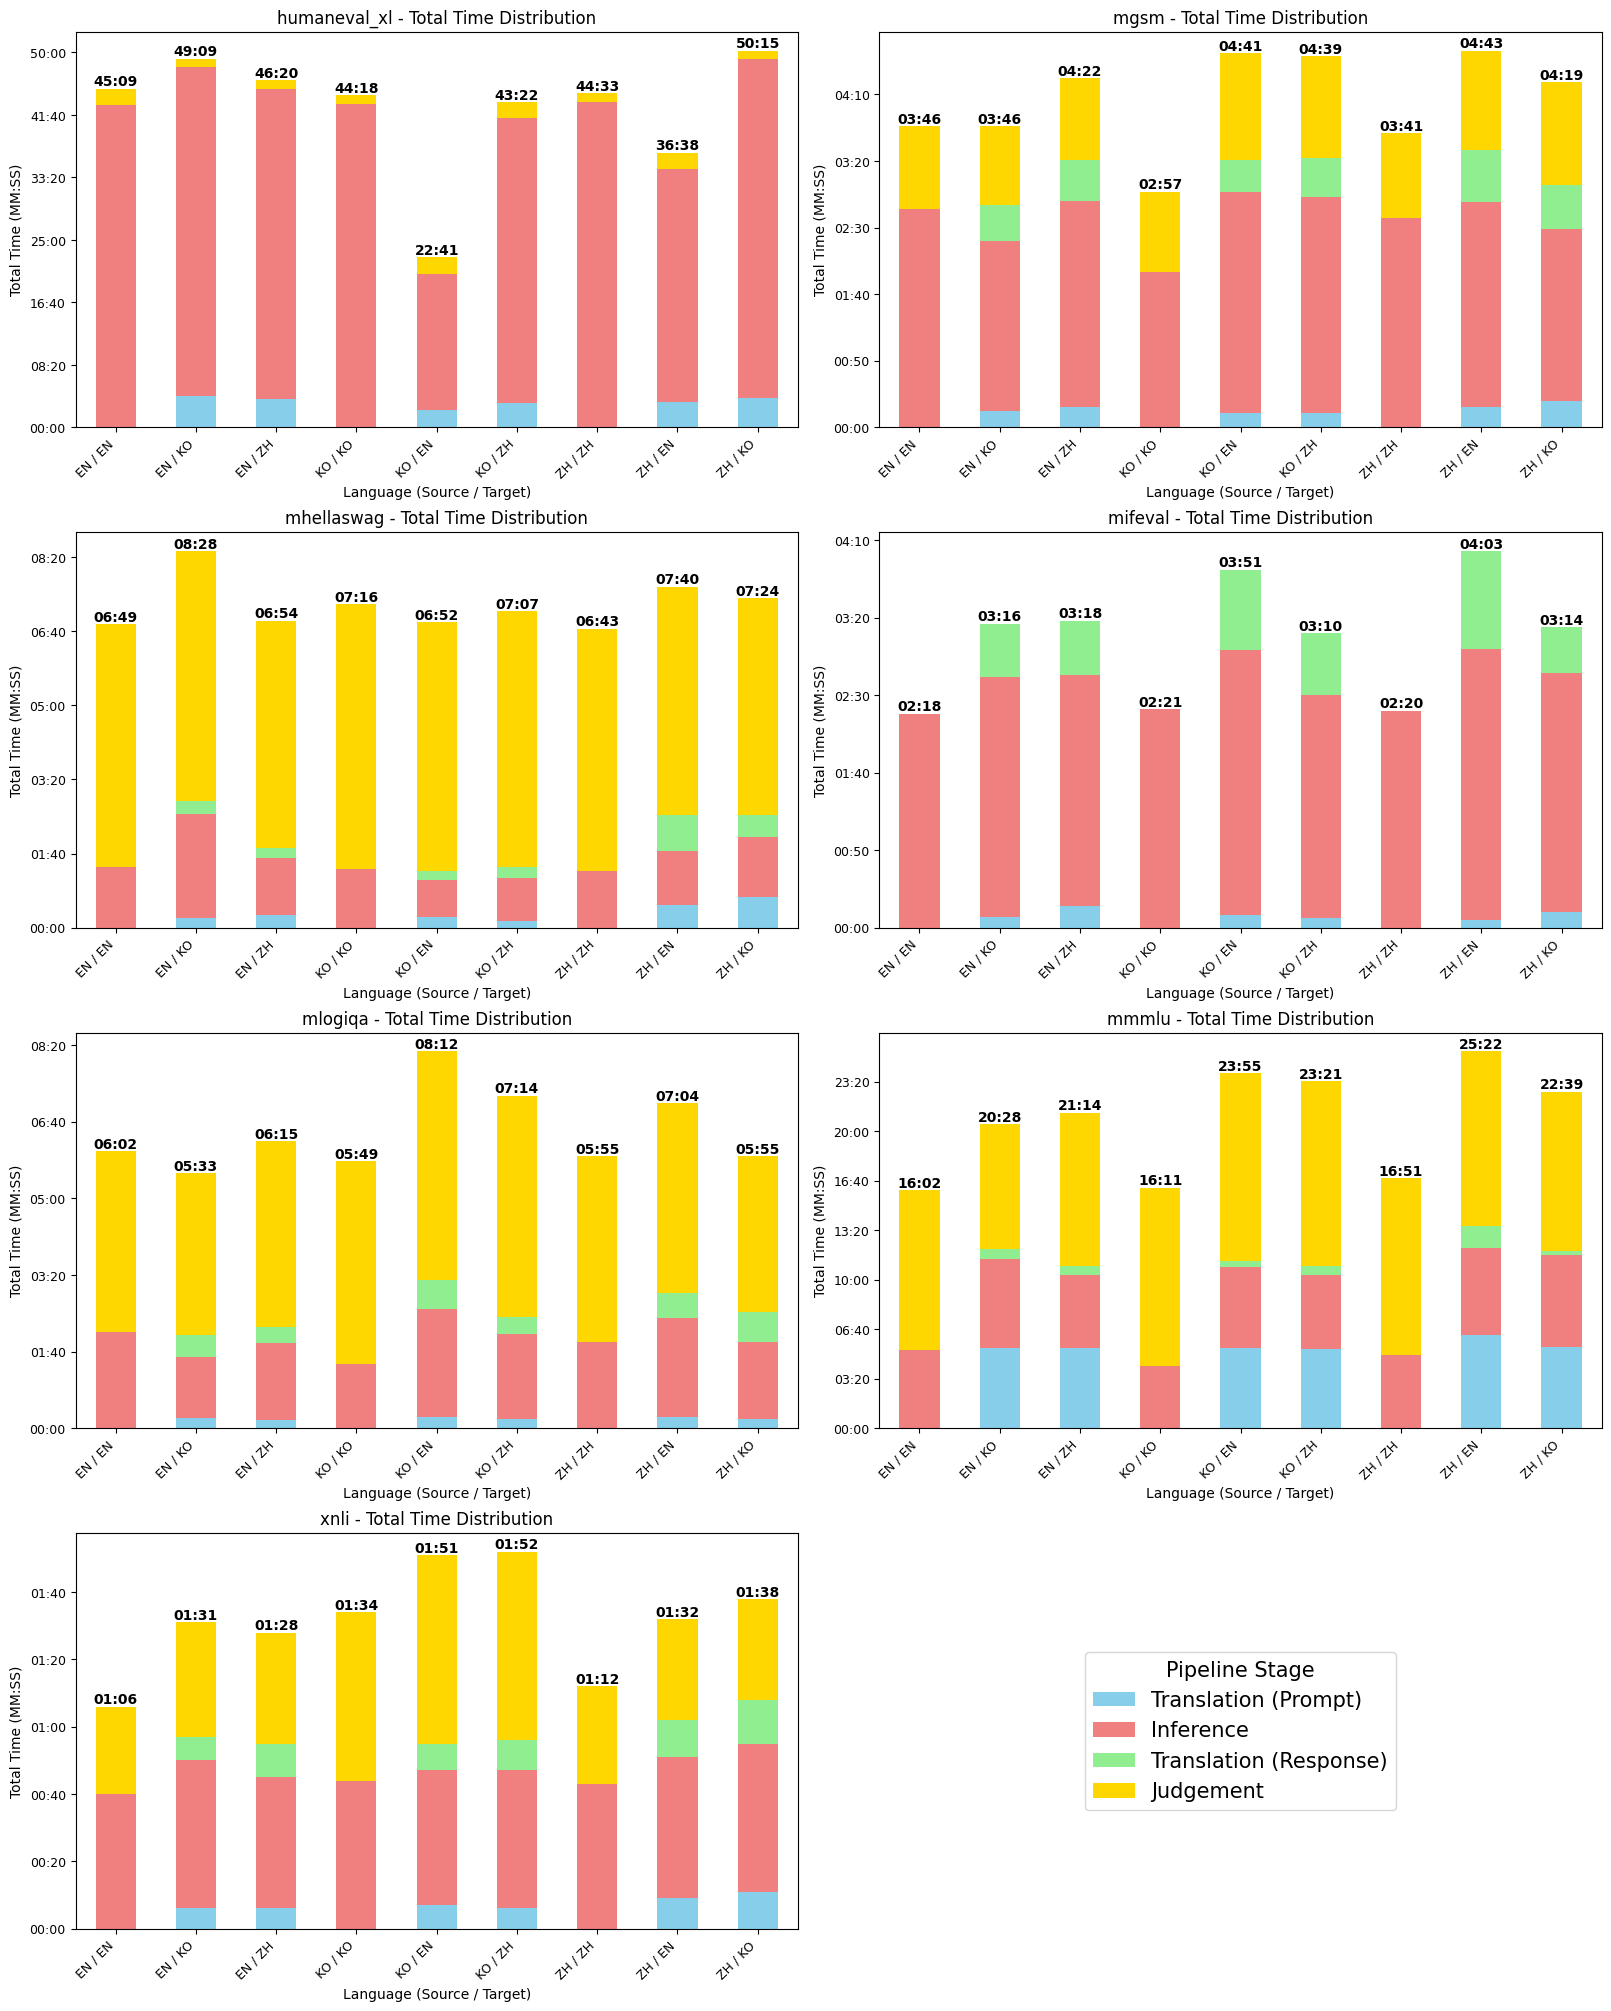

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def convert_to_seconds(time_str):
    """Converts a time string in MM:SS format to seconds."""
    if not time_str:
        return 0
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

def format_seconds_to_mmss(seconds):
    """Formats seconds into MM:SS string."""
    minutes = int(seconds // 60)
    remaining_seconds = int(seconds % 60)
    return f"{minutes:02d}:{remaining_seconds:02d}"

# Prepare data for plotting actual times
plot_data_seconds = {}

for benchmark, lang_data in pmmeval_exp_time.items():
    benchmark_df_rows = []
    for lang_pair, times in lang_data.items():
        trans_ques_sec = convert_to_seconds(times.get("trans_ques", ""))
        inference_sec = convert_to_seconds(times.get("inference", ""))
        trans_ans_sec = convert_to_seconds(times.get("trans_ans", ""))
        check_sec = convert_to_seconds(times.get("check", ""))

        benchmark_df_rows.append({
            "Language Pair": lang_pair,
            "trans_ques": trans_ques_sec,
            "inference": inference_sec,
            "trans_ans": trans_ans_sec,
            "check": check_sec
        })
    plot_data_seconds[benchmark] = pd.DataFrame(benchmark_df_rows).set_index("Language Pair")

# Plotting
num_benchmarks = len(plot_data_seconds)
cols = 2
rows = (num_benchmarks + cols - 1) // cols # Calculate rows needed for 2 columns

# Adjust figsize to provide more space for rotated labels and a larger overall plot
fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows), constrained_layout=True)
axes = axes.flatten() # Flatten the axes array for easy iteration

# Define colors for the stacked bars
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
labels = ['Translation (Prompt)', 'Inference', 'Translation (Response)', 'Judgement'] # More descriptive labels
stage_columns = ['trans_ques', 'inference', 'trans_ans', 'check']

# Plot each benchmark
for i, (benchmark_name, df_benchmark) in enumerate(plot_data_seconds.items()):
    ax = axes[i]
    # Plot the stacked bar chart for each benchmark, using language pairs as x-axis
    df_benchmark.plot(kind='bar', stacked=True, ax=ax, color=colors, legend=False)

    ax.set_title(f'{benchmark_name} - Total Time Distribution', fontsize=12)
    ax.set_ylabel('Total Time (MM:SS)', fontsize=10)
    ax.set_xlabel('Language (Source / Target)', fontsize=10)
    
    # Rotate x-tick labels for better readability and align them
    ax.set_xticklabels(df_benchmark.index, rotation=45, ha='right', fontsize=9)
    
    # Format y-axis to display as MM:SS
    formatter = mticker.FuncFormatter(lambda x, p: format_seconds_to_mmss(x))
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params(axis='y', labelsize=9)

    # Label total time on top of each bar
    for j, (lang_pair, row_data) in enumerate(df_benchmark.iterrows()):
        total_time_sec = row_data[stage_columns].sum()
        if total_time_sec > 0: # Only label if there's actual time spent
            ax.text(j, total_time_sec, format_seconds_to_mmss(total_time_sec),
                    ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Identify the first empty subplot and place the legend there
first_empty_subplot_idx = num_benchmarks
if first_empty_subplot_idx < len(axes): # Check if there are indeed empty subplots
    legend_ax = axes[first_empty_subplot_idx]
    
    # Hide the axes components of this subplot
    legend_ax.set_xticks([])
    legend_ax.set_yticks([])
    legend_ax.set_frame_on(False) # Hide the frame
    legend_ax.patch.set_visible(False) # Hide the background patch

    # Place the legend in this subplot's area
    # Use loc='center' to center the legend within the subplot's bounding box
    # bbox_to_anchor is usually used with fig.legend or when positioning relative to the figure.
    # For ax.legend, if loc='center', it automatically centers within the axes.
    legend_ax.legend(handles, labels, loc='center', ncol=1, title="Pipeline Stage", fontsize=15, title_fontsize=15)
    
    # Remove any other unused subplots that are after the legend subplot
    for j in range(first_empty_subplot_idx + 1, len(axes)):
        fig.delaxes(axes[j])
else: # If there are no empty subplots (e.g., if num_benchmarks fills all), place the legend globally
    # Reposition to avoid overlap if it's placed globally.
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1, title="Pipeline Stage", fontsize=10, title_fontsize=11)


# Add a main title for the entire figure
#plt.suptitle('Total Time Distribution per Stage across Language Pairs by Benchmark',
#             fontsize=18, y=1.02) # Adjust y to prevent overlap with subplots

plt.savefig('benchmark_total_time_stacked_labeled_legend_in_empty_subplot.png', dpi=300, bbox_inches='tight')

print("Plot saved to 'benchmark_total_time_stacked_labeled_legend_in_empty_subplot.png'")

In [1]:
import pandas as pd

annotated_df1 = pd.read_csv("/work/u5110390/BenchWeaver/logs/annotations/['Annotator 1']_annotated.csv")
annotated_df2 = pd.read_csv("/work/u5110390/BenchWeaver/logs/annotations/['Annotator 2']_annotated.csv")
annotated_df3 = pd.read_csv("/work/u5110390/BenchWeaver/logs/annotations/['Annotator 3']_annotated.csv")

def merge_annotations(annotated_df1, annotated_df2, annotated_df3):
    # Merge the three annotated DataFrames
    annotated_df1['annotation2'] = annotated_df2['annotation2']
    annotated_df1['annotation3'] = annotated_df3['annotation3']
    print("After merging annotations:")
    print(annotated_df1.isna().sum())
    return annotated_df1

merged_annotations = merge_annotations(annotated_df1, annotated_df2, annotated_df3)
merged_annotations.head()

After merging annotations:
check_result    0
check_prompt    0
subject         0
ID              0
annotation1     0
annotation2     0
annotation3     0
dtype: int64


,check_result,check_prompt,subject,ID,annotation1,annotation2,annotation3
0,True,你是一個評估模型，將被給予一個選擇題問題、一個 LLM 回應，以及一個選項 增加可撤式局部義...,dentistry,8ad2f4b7-6f0d-4c22-b5e4-7214ad84bfff,True,True,True
1,False,你是一個評估模型，將被給予一個選擇題問題、一個 LLM 回應，以及一個選項 下顎正中乳門齒。...,dentistry,2bb84ed7-13ce-4687-875d-4911e6dba3b7,False,False,False
2,True,你是一個評估模型，將被給予一個選擇題問題、一個 LLM 回應，以及一個選項 局部組織鈉離子通...,dentistry,d375c6a5-30e6-4aff-a0bc-72d0f8495ef0,False,False,False
3,True,Determine whether the LLM Response correctly a...,main,e5cb153e-ce21-4230-b029-d7c3572162b5,True,True,True
4,False,Determine whether the LLM Response correctly a...,main,fd4d585a-3c64-4bd8-8839-e16150ac93f1,False,True,False


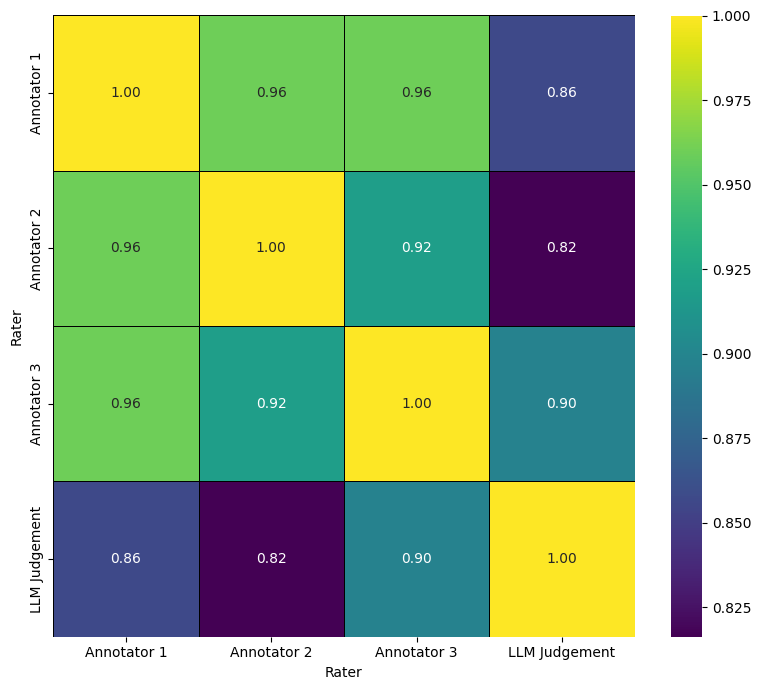

In [2]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_pairwise_kappa_heatmap(df):
    """
    Calculates Cohen's Kappa for all pairwise combinations of annotators
    and the 'check_result' column, then displays it as a 4x4 heatmap.

    Args:
        df (pd.DataFrame): The DataFrame containing annotation data
                          and the 'check_result' column.
                          Expected columns: 'check_result', 'annotation1', 'annotation2', 'annotation3'.
    """

    # Ensure all relevant columns are boolean
    rater_columns = ['annotation1', 'annotation2', 'annotation3', 'check_result']
    for col in rater_columns:
        if col in df.columns:
            df[col] = df[col].astype(bool)
        else:
            print(f"Error: Column '{col}' not found in DataFrame. Please ensure it exists.")
            return

    # Define the raters for the heatmap axes
    rater_labels = ['Annotator 1', 'Annotator 2', 'Annotator 3', 'LLM Judgement']
    actual_columns = ['annotation1', 'annotation2', 'annotation3', 'check_result']

    # Initialize a 4x4 matrix for Kappa scores
    kappa_matrix = np.eye(len(rater_columns)) # Start with identity matrix (1s on diagonal)

    # Calculate Cohen's Kappa for all unique pairs
    for i in range(len(rater_columns)):
        for j in range(i + 1, len(rater_columns)): # Only calculate upper triangle (Kappa is symmetric)
            rater1_col = actual_columns[i]
            rater2_col = actual_columns[j]

            # Ensure there's data to calculate kappa
            if not df[[rater1_col, rater2_col]].dropna().empty:
                kappa_score = cohen_kappa_score(df[rater1_col], df[rater2_col])
            else:
                kappa_score = np.nan # Or 0, depending on desired representation for no overlapping data

            kappa_matrix[i, j] = kappa_score
            kappa_matrix[j, i] = kappa_score # Populate the symmetric lower triangle

    # Create a DataFrame for the heatmap for better labeling
    kappa_df = pd.DataFrame(kappa_matrix, index=rater_labels, columns=rater_labels)

    # --- Plotting the Heatmap ---
    plt.figure(figsize=(8, 7))
    sns.heatmap(kappa_df, annot=True, fmt=".2f", cmap="viridis", linewidths=.5, linecolor='black')
    #plt.title("Pairwise Cohen's Kappa Agreement (Annotators vs. Check Result)")
    plt.xlabel("Rater")
    plt.ylabel("Rater")
    plt.tight_layout()
    plt.show()

# --- Run the function with your DataFrame ---
plot_pairwise_kappa_heatmap(merged_annotations.copy()) # Use .copy() to avoid modifying the original

                               EN   ZH  ZH-TW   KO
Llama-3.1-8B-Instruct         1.0  3.0    3.0  1.0
Llama3.1-8B-Chinese-Chat      2.0  1.0    1.0  3.0
Llama-3.1-TAIDE-LX-8B-Chat    4.0  2.0    2.0  4.0
Llama-3.1-Korean-8B-Instruct  3.0  4.0    4.0  2.0
Number of models: 4


/tmp/ipykernel_1221002/3631115408.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_normalized_scores = df_ranks.applymap(lambda x: calculate_normalized_rank_score(x, num_models))


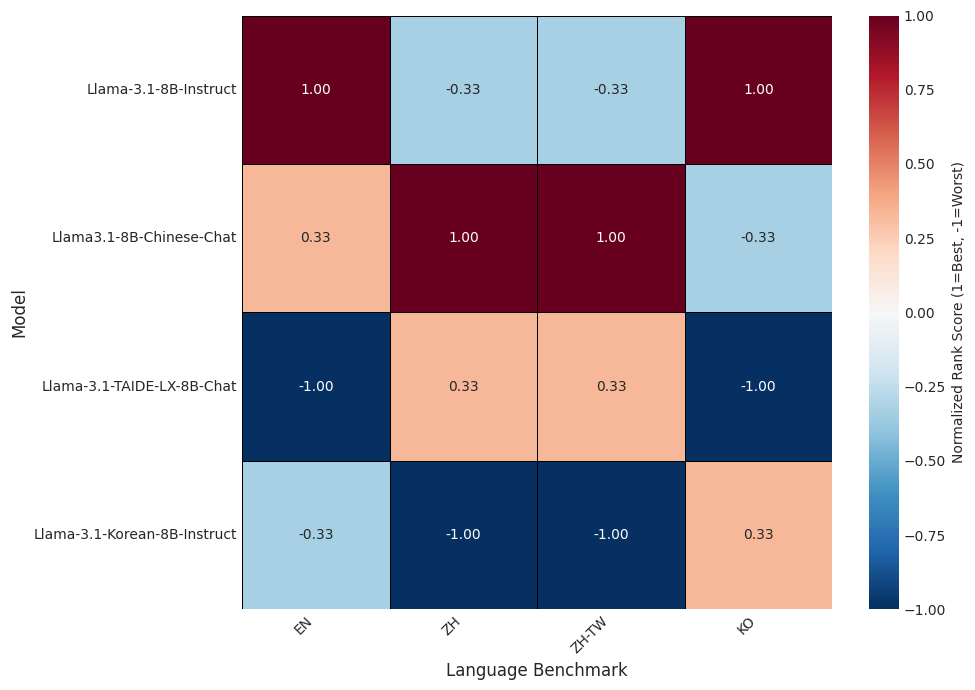

In [1]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def calculate_normalized_rank_score(rank, num_models):
    """
    Calculates the Normalized Rank Score for a given rank.
    Score ranges from 1 (1st rank) to -1 (last rank).

    Args:
        rank (float): The rank of the model (e.g., 1.0, 2.0, 3.0, 4.0).
        num_models (int): The total number of models being ranked.

    Returns:
        float: The normalized rank score.
    """
    if num_models <= 1:
        # Handle cases where there's only one model to avoid division by zero.
        # In such a scenario, the single model is inherently the "best".
        return 1.0
    return 1 - 2 * (rank - 1) / (num_models - 1)

def generate_cross_lingual_heatmap(df_ranks):
    """
    Generates a heatmap of cross-lingual consistency using Normalized Rank Scores.

    Args:
        df_ranks (pd.DataFrame): A DataFrame where rows are models and columns
                                 are languages, containing the average ranks.
                                 Example:
                                 Model                       EN   ZH  ZH-TW   KO
                                 Llama-3.1-8B-Instruct         1.0  3.0    3.0  1.0
                                 Llama3.1-8B-Chinese-Chat      2.0  1.0    1.0  3.0
                                 Llama-3.1-TAIDE-LX-8B-Chat    4.0  2.0    2.0  4.0
                                 Llama-3.1-Korean-8B-Instruct  3.0  4.0    4.0  2.0
    """
    num_models = len(df_ranks)
    print(f"Number of models: {num_models}")

    # Apply the normalization function to each rank in the DataFrame
    df_normalized_scores = df_ranks.applymap(lambda x: calculate_normalized_rank_score(x, num_models))

    # Calculate the average consistency for each model across languages
    df_normalized_scores['Average Consistency'] = df_normalized_scores.mean(axis=1)

    # Prepare data for the heatmap (excluding the 'Average Consistency' column for the main heatmap)
    heatmap_data = df_normalized_scores.drop(columns=['Average Consistency'])

    # Set up the matplotlib figure and axes for the heatmap
    plt.figure(figsize=(10, 7)) # Adjust figure size as needed for readability
    plt.style.use('seaborn-v0_8-darkgrid') # Apply a nice style

    # Create the heatmap
    # cmap: 'RdBu_r' for Red-Blue diverging colormap, reversed so red is low (-1) and blue is high (1)
    # annot=True: Annotate the heatmap with the data values
    # fmt=".2f": Format annotations to two decimal places
    # linewidths: Add lines between cells for better separation
    # linecolor: Color of the lines
    # cbar_kws: Customize the color bar title
    sns.heatmap(
        heatmap_data,
        cmap='RdBu_r', # Red for low scores, Blue for high scores
        annot=True,
        fmt=".2f",
        linewidths=.5,
        linecolor='black',
        vmin=-1, # Set the minimum value for the color bar
        vmax=1,  # Set the maximum value for the color bar
        cbar_kws={'label': 'Normalized Rank Score (1=Best, -1=Worst)'}
    )

    # Set plot title and labels
    #plt.title('Cross-Lingual Consistency: Normalized Rank Scores', fontsize=16)
    plt.xlabel('Language Benchmark', fontsize=12)
    plt.ylabel('Model', fontsize=12)

    # Rotate y-axis labels for better readability if model names are long
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for languages

    # Ensure layout is tight to prevent labels from being cut off
    plt.tight_layout()

    # Display the plot
    plt.show()

data = {
    "Flores":           [23.7791, 20.6407, 13.2487, 13.1047],
    "MMLU":             [67.0916, 55.1773, 49.4018, 53.7103],
    "GSM8K":            [86.4670, 72.0243, 60.8795, 62.9265],
    "GPQA":             [12.2483,  6.3758,  3.3557,  2.5168],
    "IFEval":           [86.0365, 29.0535, 25.2553, 23.4582],
    "HellaSwag":        [74.7560, 50.4182, 46.0765, 53.0870],
    "MBPP":             [60.8000, 53.8000, 28.2000, 52.4000],
    
    "CCPM":             [65.9191, 73.9338, 72.6471, 52.8676],
    "CMMLU":            [54.3948, 52.4693, 51.4505, 45.9938],
    "CMath":            [81.7558, 79.6296, 73.7311, 63.9918],
    "CIF-Bench":        [38.9600, 56.0133, 39.7867, 24.5333],
    "C3":               [71.8937, 88.9970, 84.3189, 70.4716],
    "Chinese SafetyQA": [61.3000, 53.1000, 62.0000, 47.1000],
    
    "TAIDE-Bench":      [ 6.8068,  7.7506,  7.0797,  5.0012],
    "TMMLU+":           [46.1328, 41.2466, 42.1165, 36.3058],
    "TCEval-v2":        [ 6.7687,  5.9062,  6.2562,  3.9000],
    "DRCD":             [71.5717, 86.1723, 85.5425, 65.3879],
    
    "KMMLU":            [40.1856, 38.5156, 34.1793, 38.6183]
}

# Language mapping
language_columns = {
    "EN": ["Flores", "MMLU", "GSM8K", "GPQA", "IFEval", "HellaSwag", "MBPP"],
    "ZH": ["CCPM", "CMMLU", "CMath", "CIF-Bench", "C3", "Chinese SafetyQA"],
    "ZH-TW": ["TAIDE-Bench", "TMMLU+", "TCEval-v2", "DRCD"],
    "KO": ["KMMLU"],
}

# Compute average scores per language
models = ["Llama-3.1-8B-Instruct", "Llama3.1-8B-Chinese-Chat", "Llama-3.1-TAIDE-LX-8B-Chat", "Llama-3.1-Korean-8B-Instruct"]
df = pd.DataFrame(data, index=models)
# Step1: apply Min-Max scaling to the DataFrame
df = pd.DataFrame(
    scaler.fit_transform(df[list(data.keys())]),
    index=df.index,
    columns=language_columns["EN"] + language_columns["ZH"] + language_columns["ZH-TW"] + language_columns["KO"]
)
# Step2: calculate the mean for each language
df['EN'] = df[language_columns["EN"]].mean(axis=1)
df['ZH'] = df[language_columns["ZH"]].mean(axis=1)
df['ZH-TW'] = df[language_columns["ZH-TW"]].mean(axis=1)
df['KO'] = df[language_columns["KO"]].mean(axis=1)

# Covert to average to rank
rank_df = df[['EN', 'ZH', 'ZH-TW', 'KO']].rank(ascending=False)
print(rank_df)
# step3: generate the cross-lingual metric heatmap
generate_cross_lingual_heatmap(rank_df)
